# Pengumpulan Data

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix, plot_roc_curve, precision_recall_curve, roc_curve
from finta import TA

In [2]:
df = pd.read_csv('TLKM.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1200 non-null   int64  
 1   Unnamed: 0.1  1200 non-null   int64  
 2   day           1200 non-null   int64  
 3   date          1200 non-null   object 
 4   code          1200 non-null   object 
 5   open          1200 non-null   float64
 6   high          1200 non-null   float64
 7   low           1200 non-null   float64
 8   close         1200 non-null   float64
 9   volume        1200 non-null   int64  
 10  ma_5          1200 non-null   float64
 11  ma_10         1200 non-null   float64
 12  ma_20         1200 non-null   float64
 13  ma_50         1200 non-null   float64
 14  ma_100        1200 non-null   float64
 15  stoc_k_short  1200 non-null   float64
 16  stoc_d_long   1200 non-null   float64
 17  rsi           1200 non-null   float64
 18  macd          1200 non-null 

In [3]:
df.isnull().value_counts()

Unnamed: 0  Unnamed: 0.1  day    date   code   open   high   low    close  volume  ma_5   ma_10  ma_20  ma_50  ma_100  stoc_k_short  stoc_d_long  rsi    macd   resistance  support
False       False         False  False  False  False  False  False  False  False   False  False  False  False  False   False         False        False  False  False       False      1200
dtype: int64

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,day,date,code,open,high,low,close,volume,...,ma_10,ma_20,ma_50,ma_100,stoc_k_short,stoc_d_long,rsi,macd,resistance,support
0,10800,108000,1,2016-11-24,TLKM,3900.0,3930.0,3760.0,3810.0,91265600,...,3919.0,4054.0,4155.8,4175.2,25.757576,39.393939,34.427528,-81.301155,4300.0,3640.0
1,10801,108001,2,2016-11-25,TLKM,3770.0,3830.0,3770.0,3830.0,65999500,...,3906.0,4034.0,4150.6,4173.8,28.787879,33.333333,36.073949,-86.179179,4300.0,3640.0
2,10802,108002,3,2016-11-28,TLKM,3850.0,3860.0,3820.0,3840.0,61860400,...,3911.0,4015.0,4143.4,4172.4,30.769231,28.438228,36.926695,-88.221172,4300.0,3640.0
3,10803,108003,4,2016-11-29,TLKM,3830.0,3880.0,3830.0,3840.0,73215900,...,3911.0,3997.0,4137.0,4171.1,34.482759,31.346623,36.926695,-88.815655,4300.0,3640.0
4,10804,108004,5,2016-11-30,TLKM,3820.0,3900.0,3770.0,3780.0,145322000,...,3889.0,3976.0,4128.6,4168.2,34.146341,33.132777,33.790143,-93.055599,4300.0,3640.0


In [5]:
df['ma_5']

0       3920.0
1       3892.0
2       3874.0
3       3852.0
4       3820.0
         ...  
1195    3726.0
1196    3730.0
1197    3724.0
1198    3734.0
1199    3744.0
Name: ma_5, Length: 1200, dtype: float64

Labeling data

In [6]:
# Create a new column to represent the target label
df['label'] = 0

# Assign labels based on the threshold value
for i in range(1, len(df)):
    if df['close'][i] > df['close'][i-1]:
        df.at[i, 'label'] = 1
    elif df['close'][i] == df['close'][i-1]:
        df.at[i, 'label'] = 1
    else:
        df.at[i, 'label'] = -1

print(df["label"])

0       0
1       1
2       1
3       1
4      -1
       ..
1195    1
1196    1
1197    1
1198   -1
1199   -1
Name: label, Length: 1200, dtype: int64


In [7]:
df.head()

,Unnamed: 0,Unnamed: 0.1,day,date,code,open,high,low,close,volume,...,ma_20,ma_50,ma_100,stoc_k_short,stoc_d_long,rsi,macd,resistance,support,label
0,10800,108000,1,2016-11-24,TLKM,3900.0,3930.0,3760.0,3810.0,91265600,...,4054.0,4155.8,4175.2,25.757576,39.393939,34.427528,-81.301155,4300.0,3640.0,0
1,10801,108001,2,2016-11-25,TLKM,3770.0,3830.0,3770.0,3830.0,65999500,...,4034.0,4150.6,4173.8,28.787879,33.333333,36.073949,-86.179179,4300.0,3640.0,1
2,10802,108002,3,2016-11-28,TLKM,3850.0,3860.0,3820.0,3840.0,61860400,...,4015.0,4143.4,4172.4,30.769231,28.438228,36.926695,-88.221172,4300.0,3640.0,1
3,10803,108003,4,2016-11-29,TLKM,3830.0,3880.0,3830.0,3840.0,73215900,...,3997.0,4137.0,4171.1,34.482759,31.346623,36.926695,-88.815655,4300.0,3640.0,1
4,10804,108004,5,2016-11-30,TLKM,3820.0,3900.0,3770.0,3780.0,145322000,...,3976.0,4128.6,4168.2,34.146341,33.132777,33.790143,-93.055599,4300.0,3640.0,-1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1200 non-null   int64  
 1   Unnamed: 0.1  1200 non-null   int64  
 2   day           1200 non-null   int64  
 3   date          1200 non-null   object 
 4   code          1200 non-null   object 
 5   open          1200 non-null   float64
 6   high          1200 non-null   float64
 7   low           1200 non-null   float64
 8   close         1200 non-null   float64
 9   volume        1200 non-null   int64  
 10  ma_5          1200 non-null   float64
 11  ma_10         1200 non-null   float64
 12  ma_20         1200 non-null   float64
 13  ma_50         1200 non-null   float64
 14  ma_100        1200 non-null   float64
 15  stoc_k_short  1200 non-null   float64
 16  stoc_d_long   1200 non-null   float64
 17  rsi           1200 non-null   float64
 18  macd          1200 non-null 

In [9]:
df_def = df[['day', 'date', 'code', 'close','low','high','open','volume','ma_5','ma_10','ma_20','ma_50','ma_100','stoc_k_short','stoc_d_long','rsi', 'macd', 'label']]

df_def['volume'] = df_def['volume'].astype('float64')

df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   day           1200 non-null   int64  
 1   date          1200 non-null   object 
 2   code          1200 non-null   object 
 3   close         1200 non-null   float64
 4   low           1200 non-null   float64
 5   high          1200 non-null   float64
 6   open          1200 non-null   float64
 7   volume        1200 non-null   float64
 8   ma_5          1200 non-null   float64
 9   ma_10         1200 non-null   float64
 10  ma_20         1200 non-null   float64
 11  ma_50         1200 non-null   float64
 12  ma_100        1200 non-null   float64
 13  stoc_k_short  1200 non-null   float64
 14  stoc_d_long   1200 non-null   float64
 15  rsi           1200 non-null   float64
 16  macd          1200 non-null   float64
 17  label         1200 non-null   int64  
dtypes: float64(14), int64(2), ob

C:\Users\nizar\AppData\Local\Temp\ipykernel_20444\3289147254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def['volume'] = df_def['volume'].astype('float64')


Calculate Technical Indicators

EMA, BBANDS, OBV, MOM (market momentum), TSI, ATR, COPP, CCI, MI, MFI, EMV, UO, VORTEX, DO, CHAIKIN

In [10]:
df_def['ema'] = TA.EMA(df_def)
# df_def['obv'] = TA.OBV(df_def)
df_def['market_momentum'] = TA.MOM(df_def)
df_def['atr'] = TA.ATR(df_def)
df_def['coppock'] = TA.COPP(df_def)
df_def['cci'] = TA.CCI(df_def)
df_def['mass_index'] = TA.MI(df_def)
df_def['mfi'] = TA.MFI(df_def)
df_def['emv'] = TA.EMV(df_def)
df_def['ultimate_osci'] = TA.UO(df_def)
df_def['chaikin'] = TA.CHAIKIN(df_def)

C:\Users\nizar\AppData\Local\Temp\ipykernel_20444\836635335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def['ema'] = TA.EMA(df_def)
C:\Users\nizar\AppData\Local\Temp\ipykernel_20444\836635335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def['market_momentum'] = TA.MOM(df_def)
C:\Users\nizar\AppData\Local\Temp\ipykernel_20444\836635335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [11]:
bollinger_bands = TA.BBANDS(df_def)
df_def = pd.concat([df_def, bollinger_bands], axis=1)
tsi = TA.TSI(df_def)
df_def = pd.concat([df_def, tsi], axis=1)
vortex = TA.VORTEX(df_def)
df_def = pd.concat([df_def, vortex], axis=1)
donchian = TA.DO(df_def)
df_def = pd.concat([df_def, donchian], axis=1)

In [12]:
df_def.isnull().value_counts()

day    date   code   close  low    high   open   volume  ma_5   ma_10  ma_20  ma_50  ma_100  stoc_k_short  stoc_d_long  rsi    macd   label  ema    market_momentum  atr    coppock  cci    mass_index  mfi    emv    ultimate_osci  chaikin  BB_UPPER  BB_MIDDLE  BB_LOWER  TSI    signal  VIm    VIp    LOWER  MIDDLE  UPPER
False  False  False  False  False  False  False  False   False  False  False  False  False   False         False        False  False  False  False  False            False  False    False  False       False  False  False          False    False     False      False     False  False   False  False  False  False   False    1154
                                                                                                                                                                                                                                                                                    True    False  False  False  False   False      11
                           

In [13]:
df_def

,day,date,code,close,low,high,open,volume,ma_5,ma_10,...,BB_UPPER,BB_MIDDLE,BB_LOWER,TSI,signal,VIm,VIp,LOWER,MIDDLE,UPPER
0,1,2016-11-24,TLKM,3810.0,3760.0,3930.0,3900.0,91265600.0,3920.0,3919.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2016-11-25,TLKM,3830.0,3770.0,3830.0,3770.0,65999500.0,3892.0,3906.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2016-11-28,TLKM,3840.0,3820.0,3860.0,3850.0,61860400.0,3874.0,3911.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2016-11-29,TLKM,3840.0,3830.0,3880.0,3830.0,73215900.0,3852.0,3911.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2016-11-30,TLKM,3780.0,3770.0,3900.0,3820.0,145322000.0,3820.0,3889.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3760.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1196,2021-11-03,TLKM,3720.0,3620.0,3740.0,3620.0,48810500.0,3726.0,3772.0,...,3878.537145,3776.5,3674.462855,12.282379,24.190955,1.025424,0.847458,3620.0,3750.0,3880.0
1196,1197,2021-11-04,TLKM,3770.0,3720.0,3780.0,3750.0,53494200.0,3730.0,3764.0,...,3878.794426,3777.0,3675.205574,11.762096,22.415404,1.000000,0.915254,3620.0,3750.0,3880.0
1197,1198,2021-11-05,TLKM,3770.0,3710.0,3770.0,3760.0,43133000.0,3724.0,3754.0,...,3877.796008,3779.5,3681.203992,11.356543,20.835566,1.017391,0.921739,3620.0,3750.0,3880.0
1198,1199,2021-11-08,TLKM,3750.0,3710.0,3780.0,3780.0,58758600.0,3734.0,3751.0,...,3875.643430,3777.0,3678.356570,10.458873,19.353182,1.008547,0.888889,3620.0,3750.0,3880.0


In [14]:
df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   day              1200 non-null   int64  
 1   date             1200 non-null   object 
 2   code             1200 non-null   object 
 3   close            1200 non-null   float64
 4   low              1200 non-null   float64
 5   high             1200 non-null   float64
 6   open             1200 non-null   float64
 7   volume           1200 non-null   float64
 8   ma_5             1200 non-null   float64
 9   ma_10            1200 non-null   float64
 10  ma_20            1200 non-null   float64
 11  ma_50            1200 non-null   float64
 12  ma_100           1200 non-null   float64
 13  stoc_k_short     1200 non-null   float64
 14  stoc_d_long      1200 non-null   float64
 15  rsi              1200 non-null   float64
 16  macd             1200 non-null   float64
 17  label         

In [15]:
def add_obv(df):
    copy = df.copy()
    # https://stackoverflow.com/a/66827219
    copy["obv"] = (np.sign(copy["close"].diff()) * copy["volume"]).fillna(0).cumsum()
    return copy["obv"]

In [16]:
df_def['obv'] = add_obv(df_def)

In [17]:
df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   day              1200 non-null   int64  
 1   date             1200 non-null   object 
 2   code             1200 non-null   object 
 3   close            1200 non-null   float64
 4   low              1200 non-null   float64
 5   high             1200 non-null   float64
 6   open             1200 non-null   float64
 7   volume           1200 non-null   float64
 8   ma_5             1200 non-null   float64
 9   ma_10            1200 non-null   float64
 10  ma_20            1200 non-null   float64
 11  ma_50            1200 non-null   float64
 12  ma_100           1200 non-null   float64
 13  stoc_k_short     1200 non-null   float64
 14  stoc_d_long      1200 non-null   float64
 15  rsi              1200 non-null   float64
 16  macd             1200 non-null   float64
 17  label         

Remmove Nan Values

In [18]:
# We need to remove all rows that have an NaN value.
print('Before NaN Drop we have {} rows and {} columns'.format(df_def.shape[0],df_def.shape[1]))

# Any row that has a `NaN` value will be dropped.
df_def =df_def.dropna()

# Display how much we have left now.
print('After NaN Drop we have {} rows and {} columns'.format(df_def.shape[0],df_def.shape[1]))

# Print the head.
df_def.head()

Before NaN Drop we have 1200 rows and 39 columns
After NaN Drop we have 1154 rows and 39 columns


,day,date,code,close,low,high,open,volume,ma_5,ma_10,...,BB_MIDDLE,BB_LOWER,TSI,signal,VIm,VIp,LOWER,MIDDLE,UPPER,obv
46,47,2017-02-01,TLKM,3940.0,3900.0,3980.0,3910.0,77648400.0,3900.0,3895.0,...,3933.5,3826.428946,0.794931,4.230797,0.895238,0.885714,3860.0,3945.0,4030.0,340520800.0
47,48,2017-02-02,TLKM,3950.0,3900.0,3980.0,3940.0,73895600.0,3902.0,3893.0,...,3933.5,3826.428946,2.097236,3.878515,0.899083,0.880734,3860.0,3945.0,4030.0,414416400.0
48,49,2017-02-03,TLKM,3950.0,3900.0,3970.0,3900.0,59225000.0,3914.0,3905.0,...,3931.0,3828.217655,3.136392,3.758648,0.936937,0.864865,3860.0,3945.0,4030.0,414416400.0
49,50,2017-02-06,TLKM,3960.0,3910.0,3960.0,3940.0,52999700.0,3934.0,3917.0,...,3928.0,3832.943230,4.302036,3.844808,0.954955,0.873874,3860.0,3945.0,4030.0,467416100.0
50,51,2017-02-07,TLKM,3920.0,3920.0,3960.0,3930.0,66017500.0,3944.0,3918.0,...,3924.0,3835.171365,3.848911,3.845448,0.963303,0.889908,3900.0,3955.0,4010.0,401398600.0


Check Imbalance label

In [19]:
app_target = pd.DataFrame(df_def.groupby('label').size(), columns=['Count'])
app_target = app_target.sort_values(by=['Count'], ascending=False)
app_target = app_target.reset_index().rename(columns={'index': 'TARGET'})
app_target

,label,Count
0,1,602
1,-1,552


# Ekstraksi Fitur

Drop unused columns

In [20]:
tes = df_def.drop(["date","day","code","open","high","low","close","volume"], axis=1)

tes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 46 to 1199
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ma_5             1154 non-null   float64
 1   ma_10            1154 non-null   float64
 2   ma_20            1154 non-null   float64
 3   ma_50            1154 non-null   float64
 4   ma_100           1154 non-null   float64
 5   stoc_k_short     1154 non-null   float64
 6   stoc_d_long      1154 non-null   float64
 7   rsi              1154 non-null   float64
 8   macd             1154 non-null   float64
 9   label            1154 non-null   int64  
 10  ema              1154 non-null   float64
 11  market_momentum  1154 non-null   float64
 12  atr              1154 non-null   float64
 13  coppock          1154 non-null   float64
 14  cci              1154 non-null   float64
 15  mass_index       1154 non-null   float64
 16  mfi              1154 non-null   float64
 17  emv          

Check feature Importance

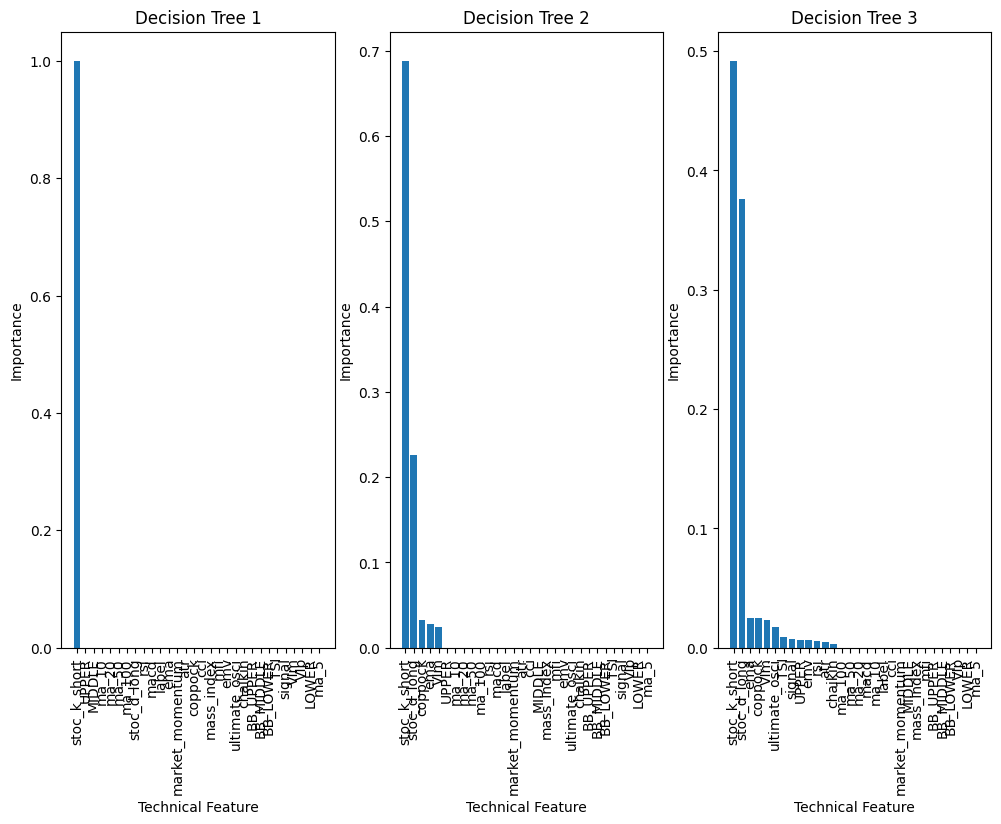

In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tes.drop(["label"], axis=1), tes["label"], test_size=0.2, random_state=0, shuffle=False)


# Train three decision tree models with different max depths
dtr1 = DecisionTreeClassifier(max_depth=2, random_state=42)
dtr2 = DecisionTreeClassifier(max_depth=4, random_state=42)
dtr3 = DecisionTreeClassifier(max_depth=6, random_state=42)

dtr1.fit(X_train, y_train)
dtr2.fit(X_train, y_train)
dtr3.fit(X_train, y_train)

# Extract the feature importances
feat_importance1 = dtr1.feature_importances_
feat_importance2 = dtr2.feature_importances_
feat_importance3 = dtr3.feature_importances_


# Sort the feature importances in descending order for each decision tree
sorted_feat_importance1 = np.argsort(feat_importance1)[::-1]
sorted_feat_importance2 = np.argsort(feat_importance2)[::-1]
sorted_feat_importance3 = np.argsort(feat_importance3)[::-1]

# Plot the feature importances of each decision tree as a bar chart
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.bar(range(len(sorted_feat_importance1)), feat_importance1[sorted_feat_importance1])
plt.xticks(range(len(sorted_feat_importance1)), tes.columns[sorted_feat_importance1], rotation=90)
plt.title("Decision Tree 1")
plt.xlabel("Technical Feature")
plt.ylabel("Importance")

plt.subplot(1, 3, 2)
plt.bar(range(len(sorted_feat_importance2)), feat_importance2[sorted_feat_importance2])
plt.xticks(range(len(sorted_feat_importance2)), tes.columns[sorted_feat_importance2], rotation=90)
plt.title("Decision Tree 2")
plt.xlabel("Technical Feature")
plt.ylabel("Importance")

plt.subplot(1, 3, 3)
plt.bar(range(len(sorted_feat_importance3)), feat_importance3[sorted_feat_importance3])
plt.xticks(range(len(sorted_feat_importance3)), tes.columns[sorted_feat_importance3], rotation=90)
plt.title("Decision Tree 3")
plt.xlabel("Technical Feature")
plt.ylabel("Importance")

# plt.subplots_adjust(wspace=0.001)
plt.show() 

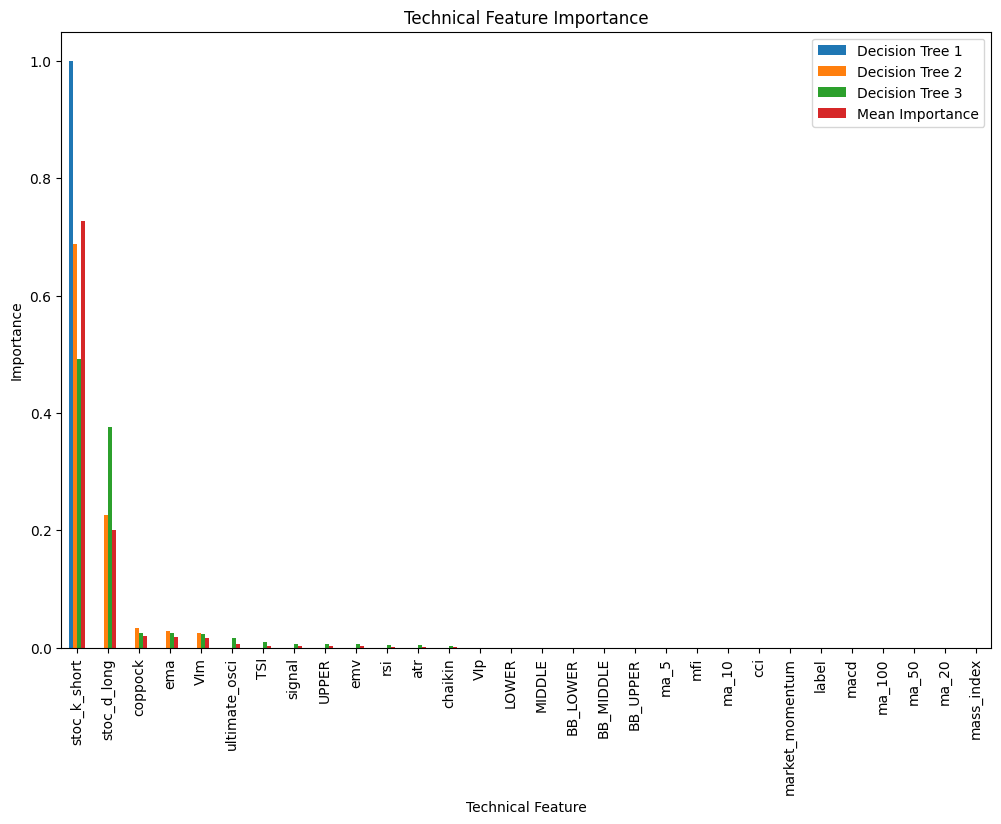

In [22]:
# Get the unique list of technical features across all three decision trees
unique_features = np.unique(np.concatenate((sorted_feat_importance1, sorted_feat_importance2, sorted_feat_importance3)))


# Create a dataframe to store the feature importances for each decision tree
feat_importance_df = pd.DataFrame({
    "Decision Tree 1": feat_importance1[unique_features],
    "Decision Tree 2": feat_importance2[unique_features],
    "Decision Tree 3": feat_importance3[unique_features],
}, index=tes.columns[unique_features])

# Calculate the mean feature importance across all three decision trees
feat_importance_df["Mean Importance"] = feat_importance_df.mean(axis=1)

# Sort the dataframe by mean feature importances in descending order
feat_importance_df = feat_importance_df.sort_values(by="Mean Importance", ascending=False)


# Plot the feature importances of all three decision trees as a bar chart
feat_importance_df.plot(kind="bar", figsize=(12, 8))
plt.title("Technical Feature Importance")
plt.xlabel("Technical Feature")
plt.ylabel("Importance")
plt.show()

In [23]:
feat_importance_df

,Decision Tree 1,Decision Tree 2,Decision Tree 3,Mean Importance
stoc_k_short,1.0,0.688035,0.491680,0.726572
stoc_d_long,0.0,0.226032,0.375837,0.200623
coppock,0.0,0.032955,0.024594,0.019183
ema,0.0,0.028365,0.025141,0.017835
VIm,0.0,0.024614,0.023133,0.015916
ultimate_osci,0.0,0.000000,0.017153,0.005718
TSI,0.0,0.000000,0.009082,0.003027
signal,0.0,0.000000,0.007099,0.002366
UPPER,0.0,0.000000,0.006822,0.002274
emv,0.0,0.000000,0.006260,0.002087


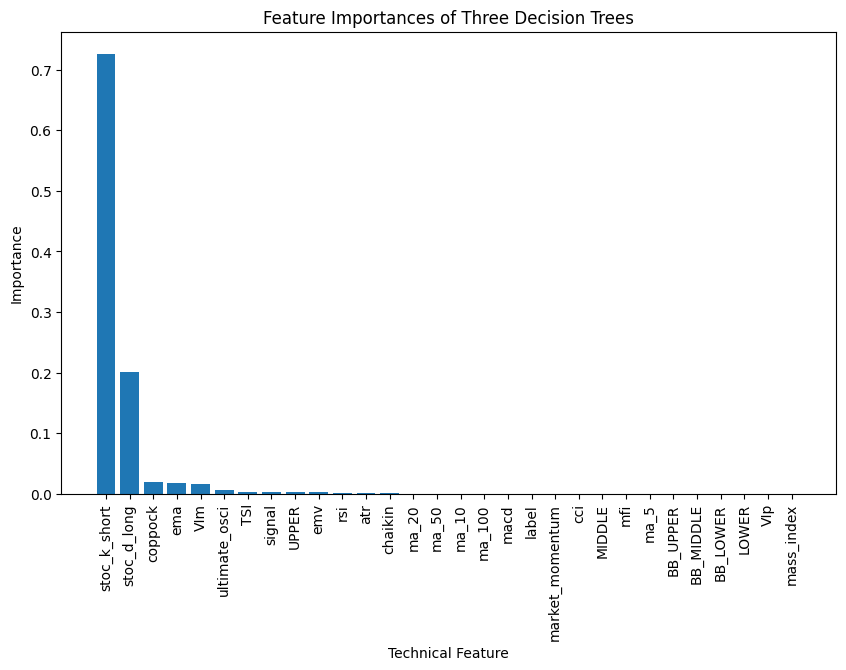

In [24]:
# Sort the features by mean importance in descending order
sorted_feat_importance = feat_importance_df['Mean Importance'].sort_values(ascending=False).index

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feat_importance)), feat_importance_df.loc[sorted_feat_importance, 'Mean Importance'])
plt.xticks(range(len(sorted_feat_importance)), sorted_feat_importance, rotation=90)
plt.title("Feature Importances of Three Decision Trees")
plt.xlabel("Technical Feature")
plt.ylabel("Importance")
plt.show()

# Random Forest

## Training

In [25]:
# Create a Random Forest Classifier
rand_frst_clf = RandomForestClassifier(n_estimators=5, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Fit the data to the model
rand_frst_clf.fit(X_train, y_train)

# Make predictions
y_pred_def = rand_frst_clf.predict(X_test)

In [26]:
print("Best parameters:", rand_frst_clf.get_params())
# print("Params score:", rand_frst_clf.score)

Best parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 5, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


## Testing

Akurasi & klasifikasi report

In [27]:
# Once the predictions have been made, then grab the accuracy score.
print('Correct Prediction (%) Before: ', accuracy_score(y_test, rand_frst_clf.predict(X_test), normalize = True) * 100.0)

# Define the traget names
target_names = ['Down', 'Up']

# Build a classifcation report
report = classification_report(y_true = y_test, y_pred = y_pred_def, target_names = target_names, output_dict = True)

# Add it to a data frame, transpose it for readability.
report_df = pd.DataFrame(report).transpose()
display(report_df)
print('\n')

# Calculate feature importance and store in pandas series
feature_imp = pd.Series(rand_frst_clf.feature_importances_, index=tes.drop(['label'], axis=1).columns).sort_values(ascending=False)
display(feature_imp)

Correct Prediction (%) Before:  69.26406926406926


,precision,recall,f1-score,support
Down,0.703390,0.697479,0.700422,119.000000
Up,0.681416,0.687500,0.684444,112.000000
accuracy,0.692641,0.692641,0.692641,0.692641
macro avg,0.692403,0.692489,0.692433,231.000000
weighted avg,0.692736,0.692641,0.692675,231.000000


stoc_k_short       0.158012
rsi                0.075966
stoc_d_long        0.071554
cci                0.069260
chaikin            0.044809
market_momentum    0.037914
VIm                0.037354
macd               0.035535
ultimate_osci      0.034226
coppock            0.034082
mfi                0.032271
VIp                0.031626
obv                0.031202
BB_UPPER           0.029835
atr                0.025631
signal             0.024567
TSI                0.021750
emv                0.021053
BB_MIDDLE          0.017950
BB_LOWER           0.017901
ma_50              0.017504
ma_5               0.017322
ema                0.017095
mass_index         0.015964
ma_100             0.014565
ma_20              0.014429
LOWER              0.013905
MIDDLE             0.013835
ma_10              0.012568
UPPER              0.010312
dtype: float64

confusion matriks

Accuracy: 0.6926406926406926
Percision: 0.6814159292035398
Recall: 0.6875
Specificity: 0.6974789915966386
1-Specificity: 0.3025210084033613


c:\Users\nizar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


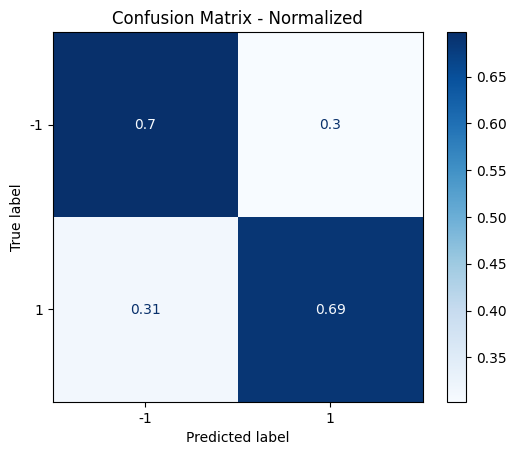

In [28]:
rf_matrix_def = confusion_matrix(y_test, y_pred_def)

true_negatives = rf_matrix_def[0][0]
false_negatives = rf_matrix_def[1][0]
true_positives = rf_matrix_def[1][1]
false_positives = rf_matrix_def[0][1]

accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
percision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)
r_specificity = false_positives / (true_negatives + false_positives)

print('Accuracy: {}'.format(float(accuracy)))
print('Percision: {}'.format(float(percision)))
print('Recall: {}'.format(float(recall)))
print('Specificity: {}'.format(float(specificity)))
print('1-Specificity: {}'.format(float(r_specificity)))

disp = plot_confusion_matrix(rand_frst_clf, X_test, y_test, normalize = 'true', cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix - Normalized')
plt.show()

Chart Analysis

In [29]:
test_roc_auc_def = roc_auc_score(y_test, y_pred_def)
print("Test ROC AUC score default: ", test_roc_auc_def)

Test ROC AUC score default:  0.6924894957983193


c:\Users\nizar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


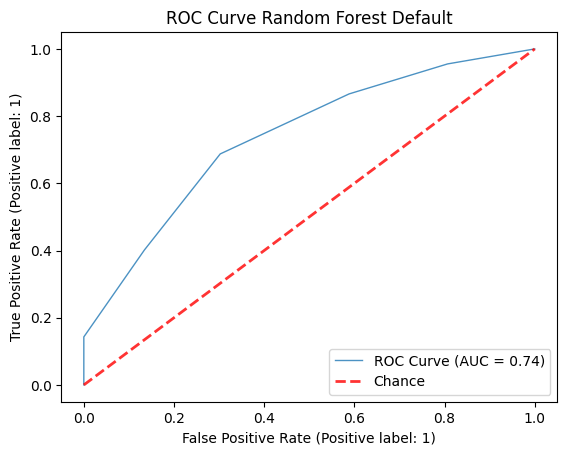

In [30]:
fig, ax = plt.subplots()

# Create an ROC Curve plot.
rfc_disp = plot_roc_curve(rand_frst_clf, X_test, y_test, alpha = 0.8, name='ROC Curve', lw=1, ax=ax)

# Add our Chance Line
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

# Make it look pretty.
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="ROC Curve Random Forest Default")

# Add the legend to the plot
ax.legend(loc="lower right")

plt.show()

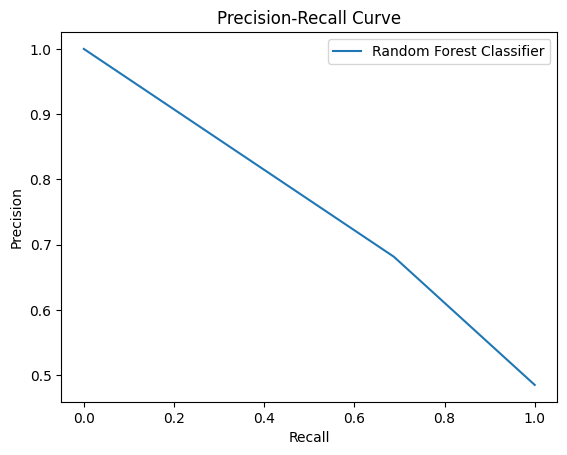

In [31]:
# Make predictions on the test data
# y_pred = random_search.predict_proba(X_test)[:, 1]

# Calculate precision and recall at different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_def)

# Plot the precision-recall curve
plt.plot(recall, precision, label='Random Forest Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Prediction chart with time window

In [32]:
index_window = df_def[['rsi','stoc_k_short', 'macd','date']]

index_window[-20:]

,rsi,stoc_k_short,macd,date
1180,68.757578,81.081081,99.724284,2021-10-12
1181,67.425498,78.378378,98.289921,2021-10-13
1182,71.049599,94.594595,100.832343,2021-10-14
1183,68.320998,88.888889,100.079742,2021-10-15
1184,65.607577,83.333333,96.754146,2021-10-18
1185,59.270009,64.516129,89.057406,2021-10-19
1186,66.855554,89.285714,90.787227,2021-10-21
1187,68.021692,96.428571,92.703328,2021-10-22
1188,58.113130,61.538462,85.968612,2021-10-25
1189,59.524144,65.217391,81.307868,2021-10-26


In [33]:
len(index_window['rsi'].unique().tolist())

1049

In [34]:
y_test.to_list()

[-1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1

In [35]:
y_axis_def = []
for i in range(len(y_pred_def)):
    y_axis_def.append(accuracy_score(y_test.to_list()[:i], y_pred_def[:i]))

c:\Users\nizar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\Users\nizar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [36]:
windo_df_def = pd.merge(X_test, index_window, on=['rsi', 'stoc_k_short', 'macd'])

windo_df_def['acc'] = y_axis_def

windo_df_def

,ma_5,ma_10,ma_20,ma_50,ma_100,stoc_k_short,stoc_d_long,rsi,macd,ema,...,TSI,signal,VIm,VIp,LOWER,MIDDLE,UPPER,obv,date,acc
0,3376.0,3274.0,3045.5,2847.0,2920.0,93.750000,91.666667,73.892715,173.801227,3293.271242,...,40.944063,27.535453,0.567073,1.274390,3220.0,3360.0,3500.0,-2.291599e+09,2020-11-27,NaN
1,3358.0,3290.0,3079.0,2855.8,2920.9,56.451613,82.879704,58.101061,160.346401,3280.616993,...,36.409606,28.803189,0.650000,1.127778,3220.0,3360.0,3500.0,-2.915742e+09,2020-11-30,0.000000
2,3336.0,3292.0,3112.0,2864.2,2922.1,52.727273,67.642962,58.516170,148.775282,3272.493595,...,33.156745,29.425125,0.819767,1.098837,3160.0,3330.0,3500.0,-2.637812e+09,2020-12-01,0.500000
3,3346.0,3307.0,3149.5,2873.0,2924.9,69.090909,59.423265,62.150665,145.193633,3283.994876,...,31.700490,29.750178,0.804598,1.068966,3160.0,3330.0,3500.0,-2.450536e+09,2020-12-02,0.666667
4,3312.0,3320.0,3176.0,2882.8,2926.7,58.333333,60.050505,60.255592,138.339707,3287.195901,...,29.934558,29.776518,0.763006,1.144509,3160.0,3330.0,3500.0,-2.571970e+09,2020-12-03,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,3726.0,3772.0,3776.5,3590.8,3420.8,38.461538,15.598291,50.977215,34.950299,3742.959801,...,12.282379,24.190955,1.025424,0.847458,3620.0,3750.0,3880.0,-2.671270e+09,2021-11-03,0.690265
227,3730.0,3764.0,3777.0,3598.8,3423.8,57.692308,34.829060,54.778127,34.180575,3748.367841,...,11.762096,22.415404,1.000000,0.915254,3620.0,3750.0,3880.0,-2.617776e+09,2021-11-04,0.691630
228,3724.0,3754.0,3779.5,3607.0,3427.4,57.692308,51.282051,54.778127,33.187992,3752.694273,...,11.356543,20.835566,1.017391,0.921739,3620.0,3750.0,3880.0,-2.617776e+09,2021-11-05,0.692982
229,3734.0,3751.0,3777.0,3615.6,3430.5,50.000000,55.128205,52.876261,30.436676,3752.155418,...,10.458873,19.353182,1.008547,0.888889,3620.0,3750.0,3880.0,-2.676535e+09,2021-11-08,0.694323


In [37]:
windf_def = windo_df_def[['date','acc']]


windf_def = windf_def.fillna(0)
windf_def.isnull().value_counts()

date   acc  
False  False    231
dtype: int64

In [38]:
windf_def['acc']

0      0.000000
1      0.000000
2      0.500000
3      0.666667
4      0.750000
         ...   
226    0.690265
227    0.691630
228    0.692982
229    0.694323
230    0.691304
Name: acc, Length: 231, dtype: float64

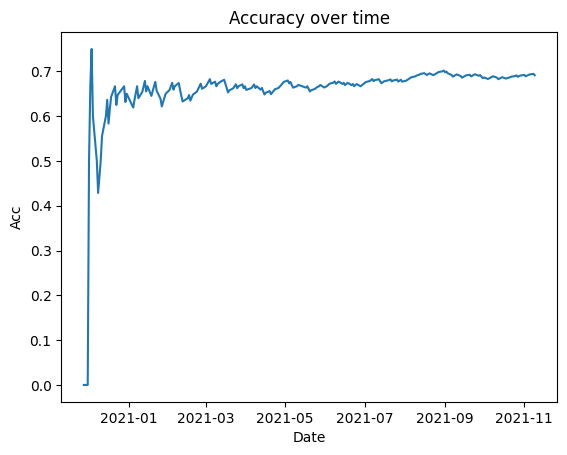

<Figure size 1500x2000 with 0 Axes>

In [39]:
# Convert date column to datetime format
windf_def['date'] = pd.to_datetime(windf_def['date'])

# Create line plot
plt.plot(windf_def['date'], windf_def['acc'])
plt.xlabel('Date')
plt.ylabel('Acc')
plt.title('Accuracy over time')
plt.figure(figsize=(15, 20))
plt.show()

# LGBM

## Training

In [40]:
# build the lightgbm model
import lightgbm as lgb

lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

In [41]:
print("Parameters:", lgbm.get_params())
# print("Params score:", rand_frst_clf)

Parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': 'warn', 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


## Testing

Akurasi & klasifikasi report

In [42]:
# Once the predictions have been made, then grab the accuracy score.
print('Correct Prediction (%): ', accuracy_score(y_test, lgbm.predict(X_test), normalize = True) * 100.0)

# Define the traget names
target_names = ['Down', 'Up']

# Build a classifcation report
report = classification_report(y_true = y_test, y_pred = y_pred_lgbm, target_names = target_names, output_dict = True)

# Add it to a data frame, transpose it for readability.
report_df = pd.DataFrame(report).transpose()
display(report_df)
print('\n')

# Calculate feature importance and store in pandas series
feature_imp = pd.Series(lgbm.feature_importances_, index=tes.drop(['label'], axis=1).columns).sort_values(ascending=False)
display(feature_imp)

Correct Prediction (%):  79.65367965367966


,precision,recall,f1-score,support
Down,0.781250,0.840336,0.809717,119.000000
Up,0.815534,0.750000,0.781395,112.000000
accuracy,0.796537,0.796537,0.796537,0.796537
macro avg,0.798392,0.795168,0.795556,231.000000
weighted avg,0.797873,0.796537,0.795985,231.000000


stoc_d_long        563
stoc_k_short       528
rsi                174
mfi                166
cci                147
obv                135
chaikin            127
ultimate_osci      120
emv                109
VIm                109
market_momentum    100
VIp                 87
mass_index          73
atr                 72
coppock             72
ma_100              55
TSI                 50
macd                43
ma_50               42
signal              39
BB_UPPER            38
BB_LOWER            31
ma_20               26
LOWER               24
ma_5                23
MIDDLE              20
ma_10               10
ema                 10
UPPER                7
BB_MIDDLE            0
dtype: int32

confusion matriks

Accuracy: 0.7965367965367965
Percision: 0.8155339805825242
Recall: 0.75
Specificity: 0.8403361344537815
1-Specificity: 0.15966386554621848


c:\Users\nizar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


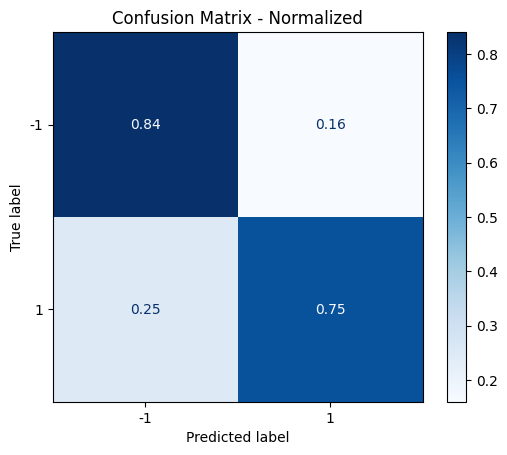

In [43]:
rf_matrix = confusion_matrix(y_test, y_pred_lgbm)

true_negatives = rf_matrix[0][0]
false_negatives = rf_matrix[1][0]
true_positives = rf_matrix[1][1]
false_positives = rf_matrix[0][1]

accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
percision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)
r_specificity = false_positives / (true_negatives + false_positives)

print('Accuracy: {}'.format(float(accuracy)))
print('Percision: {}'.format(float(percision)))
print('Recall: {}'.format(float(recall)))
print('Specificity: {}'.format(float(specificity)))
print('1-Specificity: {}'.format(float(r_specificity)))


disp = plot_confusion_matrix(lgbm, X_test, y_test, normalize = 'true', cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix - Normalized')
plt.show()

Chart Analysis

In [44]:
test_roc_auc_lgbm = roc_auc_score(y_test, y_pred_lgbm)
print("Test ROC AUC score default: ", test_roc_auc_lgbm)

Test ROC AUC score default:  0.7951680672268908


c:\Users\nizar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


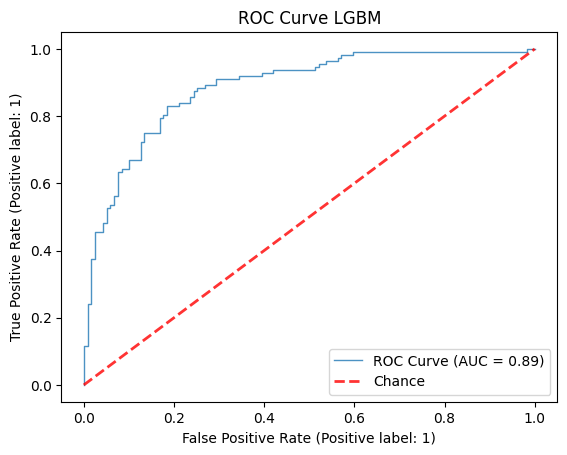

In [45]:
fig, ax = plt.subplots()

# Create an ROC Curve plot.
rfc_disp = plot_roc_curve(lgbm, X_test, y_test, alpha = 0.8, name='ROC Curve', lw=1, ax=ax)

# Add our Chance Line
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

# Make it look pretty.
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="ROC Curve LGBM")

# Add the legend to the plot
ax.legend(loc="lower right")

plt.show()

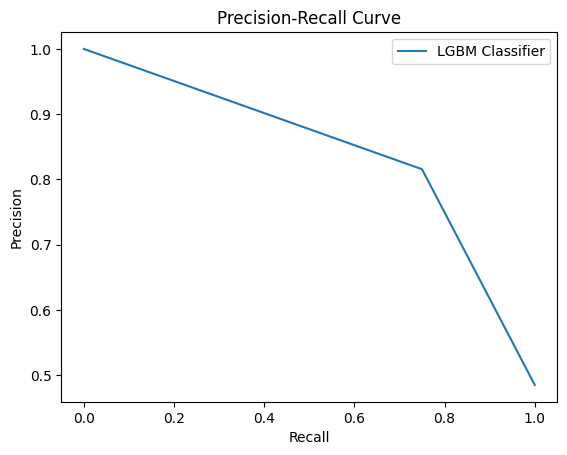

In [46]:
# Calculate precision and recall at different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lgbm)

# Plot the precision-recall curve
plt.plot(recall, precision, label='LGBM Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

Prediction chart with time window

In [47]:
y_axis_lgbm = []
for i in range(len(y_pred_lgbm)):
    y_axis_lgbm.append(accuracy_score(y_test.to_list()[:i], y_pred_lgbm[:i]))

c:\Users\nizar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\Users\nizar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [48]:
windo_df_lgbm = pd.merge(X_test, index_window, on=['rsi', 'stoc_k_short', 'macd'])

windo_df_lgbm['Accuracy'] = y_axis_lgbm

windo_df_lgbm

,ma_5,ma_10,ma_20,ma_50,ma_100,stoc_k_short,stoc_d_long,rsi,macd,ema,...,TSI,signal,VIm,VIp,LOWER,MIDDLE,UPPER,obv,date,Accuracy
0,3376.0,3274.0,3045.5,2847.0,2920.0,93.750000,91.666667,73.892715,173.801227,3293.271242,...,40.944063,27.535453,0.567073,1.274390,3220.0,3360.0,3500.0,-2.291599e+09,2020-11-27,NaN
1,3358.0,3290.0,3079.0,2855.8,2920.9,56.451613,82.879704,58.101061,160.346401,3280.616993,...,36.409606,28.803189,0.650000,1.127778,3220.0,3360.0,3500.0,-2.915742e+09,2020-11-30,0.000000
2,3336.0,3292.0,3112.0,2864.2,2922.1,52.727273,67.642962,58.516170,148.775282,3272.493595,...,33.156745,29.425125,0.819767,1.098837,3160.0,3330.0,3500.0,-2.637812e+09,2020-12-01,0.500000
3,3346.0,3307.0,3149.5,2873.0,2924.9,69.090909,59.423265,62.150665,145.193633,3283.994876,...,31.700490,29.750178,0.804598,1.068966,3160.0,3330.0,3500.0,-2.450536e+09,2020-12-02,0.333333
4,3312.0,3320.0,3176.0,2882.8,2926.7,58.333333,60.050505,60.255592,138.339707,3287.195901,...,29.934558,29.776518,0.763006,1.144509,3160.0,3330.0,3500.0,-2.571970e+09,2020-12-03,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,3726.0,3772.0,3776.5,3590.8,3420.8,38.461538,15.598291,50.977215,34.950299,3742.959801,...,12.282379,24.190955,1.025424,0.847458,3620.0,3750.0,3880.0,-2.671270e+09,2021-11-03,0.792035
227,3730.0,3764.0,3777.0,3598.8,3423.8,57.692308,34.829060,54.778127,34.180575,3748.367841,...,11.762096,22.415404,1.000000,0.915254,3620.0,3750.0,3880.0,-2.617776e+09,2021-11-04,0.792952
228,3724.0,3754.0,3779.5,3607.0,3427.4,57.692308,51.282051,54.778127,33.187992,3752.694273,...,11.356543,20.835566,1.017391,0.921739,3620.0,3750.0,3880.0,-2.617776e+09,2021-11-05,0.793860
229,3734.0,3751.0,3777.0,3615.6,3430.5,50.000000,55.128205,52.876261,30.436676,3752.155418,...,10.458873,19.353182,1.008547,0.888889,3620.0,3750.0,3880.0,-2.676535e+09,2021-11-08,0.794760


In [49]:
windf_lgbm = windo_df_lgbm[['date','Accuracy']]


windf_lgbm = windf_lgbm.fillna(0)
windf_lgbm.isnull().value_counts()

date   Accuracy
False  False       231
dtype: int64

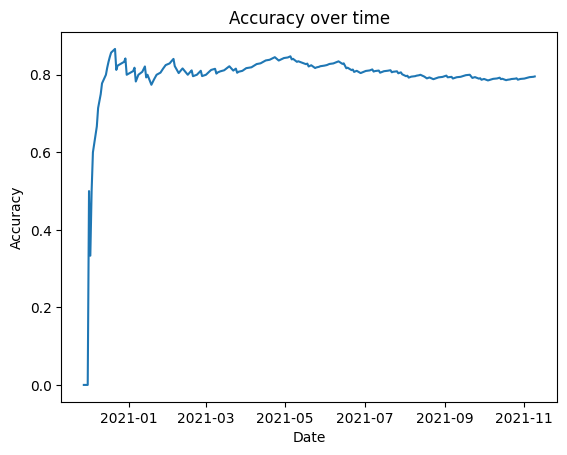

<Figure size 1500x2000 with 0 Axes>

In [50]:
# Convert date column to datetime format
windf_lgbm['date'] = pd.to_datetime(windf_lgbm['date'])

# Create line plot
plt.plot(windf_lgbm['date'], windf_lgbm['Accuracy'])
plt.xlabel('Date')
plt.ylabel('Accuracy')
plt.title('Accuracy over time')
plt.figure(figsize=(15, 20))
plt.show()